<a href="https://colab.research.google.com/github/kuprel/min-dalle/blob/main/min_dalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

### Download models and install dependencies

In [1]:
%%shell

git clone https://github.com/kuprel/min-dalle
mkdir -p /content/min-dalle/pretrained/vqgan/
curl https://huggingface.co/dalle-mini/vqgan_imagenet_f16_16384/resolve/main/flax_model.msgpack -L --output /content/min-dalle/pretrained/vqgan/flax_model.msgpack
pip install torch flax wandb
wandb login --anonymously
wandb artifact get --root=/content/min-dalle/pretrained/dalle_bart_mega dalle-mini/dalle-mini/mega-1-fp16:v14


Cloning into 'min-dalle'...
remote: Enumerating objects: 420, done.
remote: Counting objects: 100% (224/224), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 420 (delta 149), reused 179 (delta 121), pack-reused 196
Receiving objects: 100% (420/420), 1.33 MiB | 14.81 MiB/s, done.
Resolving deltas: 100% (245/245), done.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   234  100   234    0     0   1800      0 --:--:-- --:--:-- --:--:--  1800
100  290M  100  290M    0     0  93.1M      0  0:00:03  0:00:03 --:--:--  106M
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 186 kB 5.3 MB/s 
     |████████████████████████████████| 1.8 MB 60.0 MB/s 
     |████████████████████████████████| 140 kB 71.2 MB/s 
     |████████████████████████████████| 181 kB 66.4 MB/s 
     |█████

### Load Model

In [2]:
import os
os.chdir('/content/min-dalle')
from min_dalle.min_dalle_torch import MinDalleTorch

model = MinDalleTorch(is_mega=True, is_reusable=True)


initializing MinDalleTorch
reading files from pretrained/dalle_bart_mega
converting params to torch
initializing DalleBartEncoderTorch
initializing DalleBartDecoderTorch
initializing VQGanDetokenizer


### Generate an Image

tokenizing text
['Ġartificial']
['Ġintelligence']
text tokens [0, 6316, 7815, 2]
encoding text tokens
sampling image tokens
detokenizing image


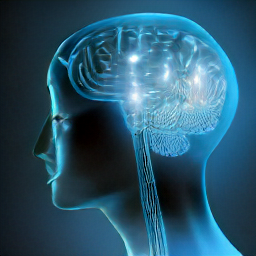

CPU times: user 7.4 s, sys: 8.11 ms, total: 7.41 s
Wall time: 7.38 s


In [4]:
%%time

text = "artificial intelligence" #@param {type:"string"}
seed = 10 #@param {type:"integer"}

image = model.generate_image(text, seed)
display(image)